In [ ]:
!pip install pillow torch matplotlib

In [1]:
from transformers import AutoImageProcessor, AutoModelForImageClassification
from PIL import Image
import requests

c:\Users\HP\Documents\GitHub\handle\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
processor = AutoImageProcessor.from_pretrained("microsoft/swinv2-large-patch4-window12-192-22k")
model = AutoModelForImageClassification.from_pretrained("microsoft/swinv2-large-patch4-window12-192-22k")

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

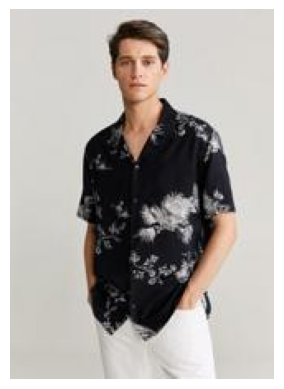

In [15]:
import os
images_folder = "../data/archive/images/images"
image_name = '81_1034451_77010000-99_.jpg'
image_path = os.path.join(images_folder, image_name)

# Now we visualize the image
image = Image.open(image_path)
plt.imshow(image)
plt.axis('off')
plt.show()



In [16]:
inputs = processor(images=image, return_tensors="pt")
outputs = model(**inputs)
logits = outputs.logits
# model predicts one of the 21k ImageNet classes
predicted_class_idx = logits.argmax(-1).item()
print("Predicted class:", model.config.id2label[predicted_class_idx])

Predicted class: LABEL_10296


In [19]:
import time

In [20]:
# Resize the image to 384x384 pixels to feed it to the model
time_start = time.time()
image = image.resize((384, 384))
time_end = time.time()

print(f"Resizing the image took {time_end - time_start:.5f} seconds")

Resizing the image took 0.00300 seconds


In [25]:
img_folder = "../data/archive/images/images"
counter = 0
time_start = time.time()
for img in os.listdir(img_folder):
    image = Image.open(os.path.join(img_folder, img))
    image.resize((384, 384))
    counter += 1
    if counter == 10000:
        break

time_end = time.time()

print(f"Resizing all images took {time_end - time_start:.5f} seconds")

Resizing all images took 86.51747 seconds
